# Wie verläuft ein Machine Learning Projekt?
8 Schritte bis zum Anwenden des neuen Systems:

1. Identifizieren des Problems; Betrachten des Großen-Ganzen
 * Hinterfrage die Aufgabenstellung
 * Sprich mit Experten, worin der Mehrwert der neuen Anwendung besteht
 * Wie wird die Anwendung anschließend benutzt (für weitere Machine Learning Systeme/Datenanalyse/Präsentation/...)
 * Welche Ergebnisse gibt es bislang? Welche Aspekte sind scheinbar von belang?
 
 für die Entwicklung direkt von Belang und resultierend aus den ersten Stichpunkten:
 * Was für Machine Learning Modelle sollten genutzt werden? (supervised/unsupervised, online/offline, ...)
 * Wie sollte die Performance gemessen werden? Wie sollte die Fehleranalyse von statten gehen?
 * Wie gut sollte die Performance für das Ziel sein?
 * Was für Probleme könnten auftreten? Gibt es bereits Erfahrungen auf diesem Gebiet?
 * Wie könnte das Problem manuell gelöst werde?
 * Vermerke und verifiziere, wenn möglich, Annahmen.

2. Laden der Daten (wenn möglich, automatisieren)
 * Auflisten der Daten (welche werden gebraucht, wieviele werden gebraucht)
 * Finden und Dokumentieren, woher die Daten bezogen werden können
 * Speicherbedarf überprüfen
 * Zertifikate und Erlaubnisse überprüfen und gegebenenfalls anfordnern
 * Workspace erstellen
 * Daten laden
 * Konvertieren der Daten zum verarbeiten in Machine Learning Algorithmen (Daten nicht ändern)
 * Anonymisieren, fall noch notwenig
 * Größe und Datentypen überprüfen (Zeitserien, Beispiele, Geografische Daten, ...)
 * Extrahiere ein Testset und entferne es aus den Trainingsdaten (diese Daten dienen ausschließlich zum Testen!)

3. Daten betrachten um erste Einsichten zu erlangen
 - Erstellen einer Kopie der Trainingsdaten
 - Betrachte jedes Attribut der Daten (Name, Datentyp, fehlende Daten?, Rauschen?, Outlier?, potenziell Wichtig?, Verteilung(Gauss, Uniform, Logarithmisch))
 - Für supervised learning identifiziere die Ziel-Attribute
 - Visualisiere die Daten
 - Wie ist die Correlation zwischen Attributen?
 - Gibt es Transformationen, die durchzuführen sind?
 - Welche Extra-Daten könnten nützlich sein?
 - Dokumentation

4. Daten vorbereiten um durch Machine Learning Algorithmen die hintergründigen Informationen besser extrahieren zu können
 Wichtig! Auf Kopien arbeiten. Für jede Tranlation Funktionen schreiben.
 - Daten säubern (entferne Outlier, Fülle fehlende Daten auf (mit mean oder 0) oder lösche die Zeilen/Spalten
 - Wähle Attribute aus (entferne 'unnütze' Feature (könnten auch nützlich sein, ohne das man es weiß))
 - Erstelle weitere Attribute (durch Kombination bzw Translation von bestehenden Attributen)
 - Extrahiere Attribute (bsp. Datum/Zeit, Kategorien->in Zahlenwerte)
 - Standartisiere oder Normalisiere Attribute

5. Probiere verschieden Modelle und vermerke die Besten (nach Möglichkeit automatisieren)
 - Trainiere verschiedene Standard-Modelle
 - Messe und vergleiche die Performance der Modelle
 - Analysiere die wichtigsten Variablen für jedes Modell
 - Analysiere die Fehler?
 - Nutze die Erkenntnisse für eine kurze Feature-Selektion und Konfiguriere einige Modelle neu
 - Wiederhole diesen Schritt bis 3-5 Modelle hervorstechen

6. Konfiguriere und Kombiniere die Modelle, um die best mögliche Lösung zu finden (nach Möglichkeit automatisieren)
 - Finde die besten Hyperparameter der Modelle durch cross-validation
 - Kombinieren der besten Modelle um ein noch besseres Ergebnis zu erlangen
 - Messen der Performanz des endgültigen Aufbaus

7. Präsentiere die Lösung
8. Verwende, Überprüfe und Warte das neue System

## Additional methods:

In [1]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

## 2. Load Data Set

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

**Print a number**

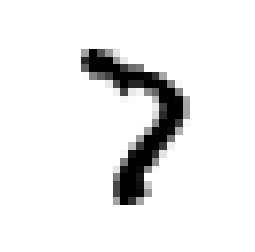

Should be 7
More examples:


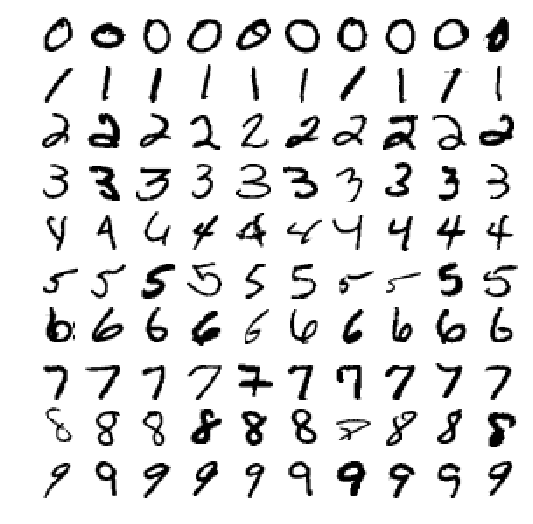

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X, y = mnist["data"], mnist["target"]
X = np.asarray(X).astype('float64')
one_digit = X[42000]
image_one_digit = one_digit.reshape(28,28)

#plt.imshow(image_one_digit, cmap = matplotlib.cm.binary, interpolation = "nearest")
#plt.axis("off")
#plt.show()
plot_digit(image_one_digit)
plt.show()

print("Should be %d"%(y[42000]))

print('More examples:')
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [ ]:

#test for showing the data in 2d
from tsne import bh_sne

vis_data = bh_sne(X[20000:])

X_x = vis_data[:,0]
X_y = vis_data[:,1]

plt.scatter(vis_x, vis_y, c=y)
plt.show()

**Cut the dataset into test and training sets and mixed it**

In [4]:
import numpy as np

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#shuffle the training set
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Binary classifier

[ True]
[False]
(100, 784)


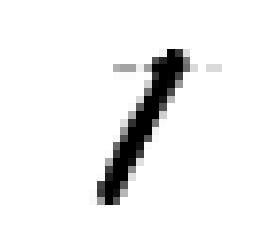

[ True]


In [24]:
from sklearn.linear_model import SGDClassifier # stochastic gradient descent

y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

sgd_clf = SGDClassifier(random_state=42,loss='squared_hinge',penalty='none') # with seed for a random number generator
# shuffle=treu: no shuffle before necessary
# loss='hinge',‘log’,‘modified_huber’,‘squared_hinge’,‘perceptron’,(... for regression): loss functions
# penalty=‘none’, ‘l2’, ‘l1’, ‘elasticnet’: penalty methods
sgd_clf.fit(X_train, y_train_7)
ans = sgd_clf.predict([one_digit]) # means that is a 7
print(ans)

y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

sgd_clf.fit(X_train, y_train_1)
ans = sgd_clf.predict([one_digit]) # means that is no 1
print(ans)

print(example_images.shape)
plot_digit(example_images[18])
plt.show()
ans = sgd_clf.predict([example_images[18]]) # means that is no 1
print(ans)